### Procesado de imágenes con Pillow

Pillow is the friendly PIL fork by Alex Clark and Contributors. PIL is the Python Imaging Library by Fredrik Lundh and Contributors.

Documentación:
    https://pillow.readthedocs.io/en/stable/

![pillow](memes.jpg)

Instalámos la librería en nuestro ordenador

In [33]:
#!pip3 install pillow

Importamos los módulos necesarios

In [8]:
from PIL import Image
import numpy as np

Abrimos una imagen

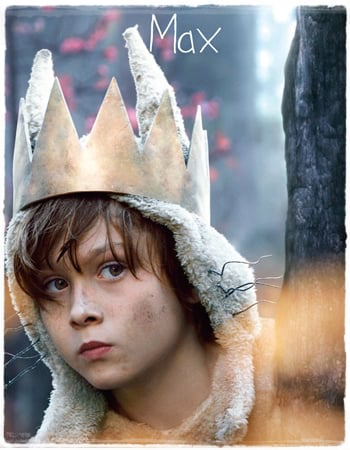

In [9]:
im = Image.open("max.jpg")
im

### Creando miniaturas

In [10]:
im2 = Image.open("concierto.png")

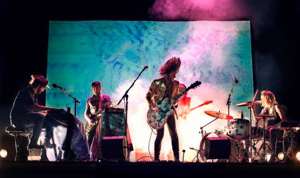

In [11]:
size = (300,300)
im2.thumbnail(size)
im2

### Image.transpose()

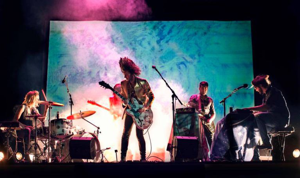

In [12]:
flip_lr = im2.transpose(Image.FLIP_LEFT_RIGHT)
flip_lr

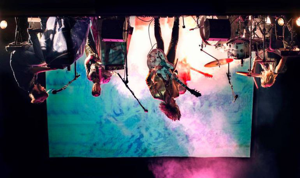

In [13]:
flip_tb = im2.transpose(Image.FLIP_TOP_BOTTOM)
flip_tb

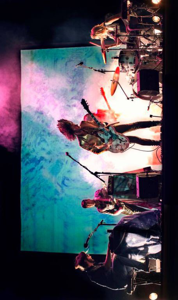

In [14]:
#Rotate 90,180,270
rotate = im2.transpose(Image.ROTATE_90)
rotate

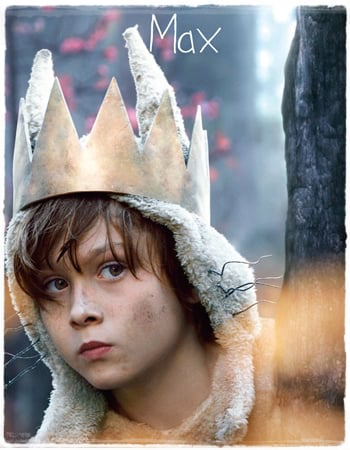

In [15]:
im

### Edición de fotografía

Módulo ImageEnhance: 
The ImageEnhance module contains a number of classes that can be used for image enhancement.
Factor – A floating point value controlling the enhancement. 
Factor 1.0 always returns a copy of the original image, 
lower factors mean less color (brightness, contrast, etc), and higher values more. 
There are no restrictions on this value

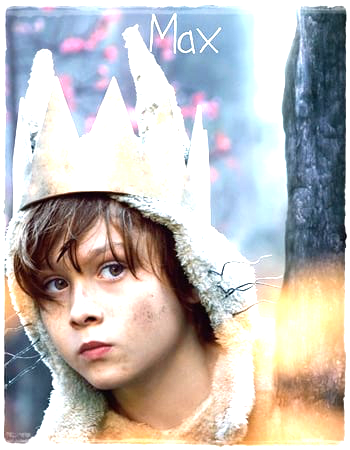

In [16]:
#Brillo
"""
This class can be used to control the brightness of an image. 
An enhancement factor of 0.0 gives a black image. A factor of 1.0 gives the original image.
"""
from PIL import ImageEnhance
brillo = ImageEnhance.Brightness(im).enhance(1.5)
brillo

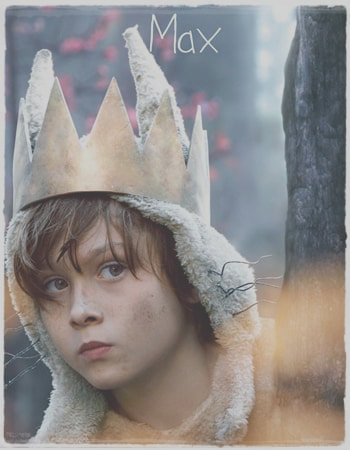

In [17]:
# Color
"""
This class can be used to adjust the colour balance of an image, in a manner similar to the controls on a colour TV set. 
An enhancement factor of 0.0 gives a black and white image. A factor of 1.0 gives the original image.
"""
color = ImageEnhance.Contrast(im).enhance(0.6)
color

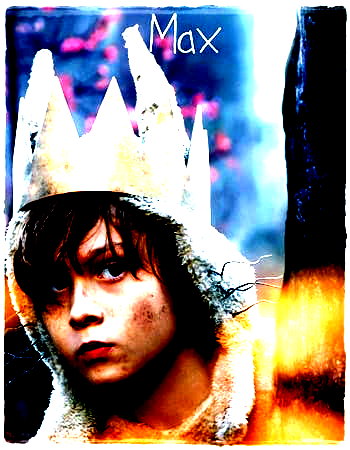

In [18]:
# Contraste.
"""
This class can be used to control the contrast of an image, similar to the contrast control on a TV set. 
An enhancement factor of 0.0 gives a solid grey image. A factor of 1.0 gives the original image.
"""
contraste = ImageEnhance.Contrast(im).enhance(4)
contraste

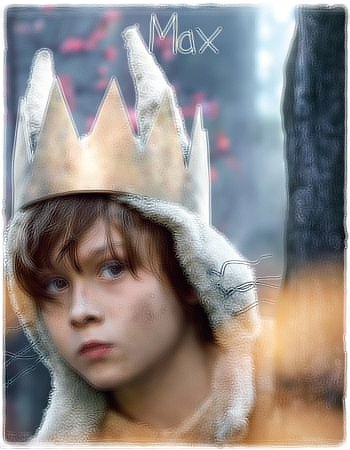

In [19]:
#Diminuir nitidez.
"""
This class can be used to adjust the sharpness of an image. 
An enhancement factor of 0.0 gives a blurred image, a factor of 1.0 gives the original image, and a factor of 2.0 gives a sharpened image.
"""
desenfoque = ImageEnhance.Sharpness(im).enhance(-3)
desenfoque

¿Qué es una imagen? un conjunto de números de 0 a 255

In [20]:
a = np.random.randint(255, size=(200, 500, 3)).astype('uint8')
print(a.shape)
print(a.size)
print(a)

(200, 500, 3)
300000
[[[ 74 246  33]
  [142 159 128]
  [156 150 158]
  ...
  [160  47 134]
  [ 27 242  61]
  [168  39 222]]

 [[ 98 155 140]
  [ 89 187  23]
  [158 164 138]
  ...
  [252  17 175]
  [ 85  58  85]
  [206 252  59]]

 [[ 22  47 153]
  [ 63 191 200]
  [ 81  67 119]
  ...
  [202   3 199]
  [ 91 132 132]
  [ 20  74 147]]

 ...

 [[251  89  56]
  [ 53 151  28]
  [ 85  95 219]
  ...
  [145   0  30]
  [ 47  34  17]
  [ 28  35 132]]

 [[ 13 222 111]
  [ 40  90  78]
  [141 108   9]
  ...
  [112 200 152]
  [120 170 174]
  [209 224 196]]

 [[ 98 130 165]
  [184  19 235]
  [  2  85 126]
  ...
  [144 140 228]
  [107 154  47]
  [133 194 231]]]


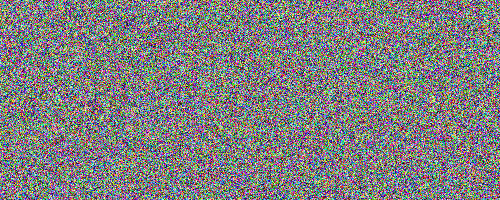

In [21]:
#Con PIL podemos convertir a imagen el array 
ruido = Image.fromarray(a)
ruido

In [22]:
ruido.save("prueba.jpg")

Si una imagen es un array en 3 dimensiones compuesto por números entre 0 y 255, entonces podemos también podemos trabajar nuestra imagen con numpy y visualizarla con matplotlib

In [23]:
imarr = np.array(im)
#imarr

In [24]:
imarr.shape

(450, 350, 3)

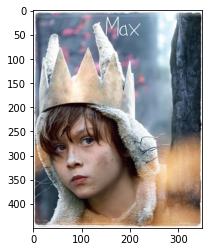

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(imarr)

In [38]:
imgbw = np.array(im.convert("L"))
print(imgbw.shape)
print(imgbw)

(450, 350)
[[254 251 252 ... 255 254 253]
 [255 255 255 ... 255 253 250]
 [255 255 255 ... 253 252 250]
 ...
 [222 223 228 ... 254 254 255]
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]]


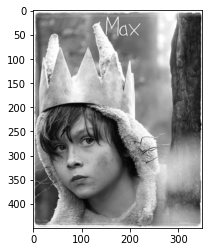

In [30]:
plt.imshow(imgbw,cmap="gray")

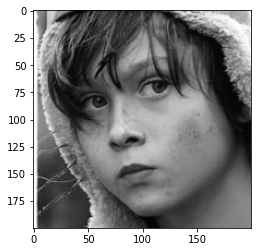

In [31]:
cara = imgbw[200:400,0:200]
plt.imshow(cara, cmap="gray")

In [32]:
imgbw.shape

(450, 350)

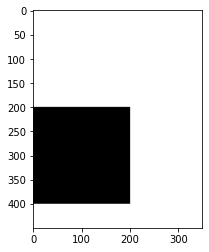

In [34]:
mask = np.ones(imgbw.shape)
mask[200:400,0:200] = 0
plt.imshow(mask, cmap="gray")

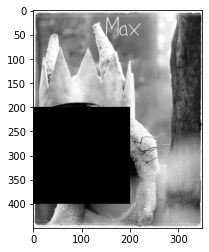

In [35]:
plt.imshow(mask*imgbw, cmap="gray")

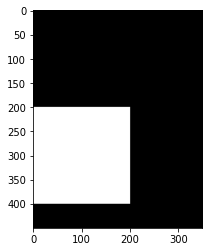

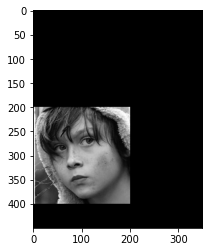

In [37]:
mask2 = np.zeros(imgbw.shape)
mask2[200:400,0:200] = 1
plt.figure()
plt.imshow(mask2, cmap="gray")
plt.figure()
plt.imshow(mask2*imgbw, cmap="gray")